# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
import pandas as pd
import numpy as np

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
!unzip archive.zip

Archive:  archive.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [41]:
df = pd.read_csv('creditcard.csv')

In [42]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [44]:
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [45]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [46]:
df.Time

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64

In [47]:
df.drop('Time', axis=1, inplace=True)

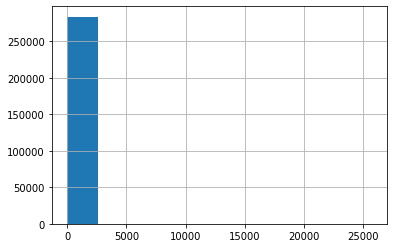

In [48]:
df[df.Class == 0].Amount.hist()

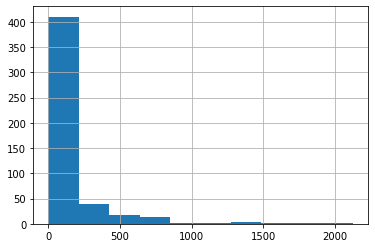

In [49]:
df[df.Class == 1].Amount.hist()

In [50]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))

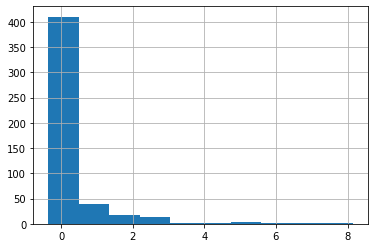

In [51]:
df[df.Class == 1].Amount.hist()

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score

In [53]:
X = df.drop('Class', axis=1)
y = df['Class']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

### Обучим модели

1. Логистическая регрессия

In [55]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, preds)}')
print(f'precision: {precision_score(y_test, preds)}')
print(f'recall: {recall_score(y_test, preds)}')
print(f'f1: {f1_score(y_test, preds)}')
print(f'roc_auc: {roc_auc_score(y_test, preds)}')

accuracy: 0.9992977774656788
precision: 0.8625
recall: 0.7040816326530612
f1: 0.7752808988764046
roc_auc: 0.8519440943231541


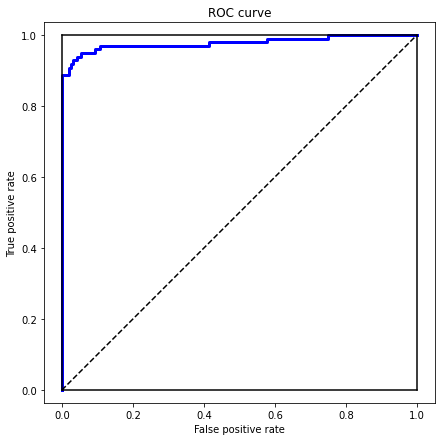

In [23]:
y_pred_proba = lr.predict_proba(X_test)[:, 1]
plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve')
plt.show()

2. KNN

In [24]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
preds = knn.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, preds)}')
print(f'precision: {precision_score(y_test, preds)}')
print(f'recall: {recall_score(y_test, preds)}')
print(f'f1: {f1_score(y_test, preds)}')
print(f'roc_auc: {roc_auc_score(y_test, preds)}')

accuracy: 0.9995435553526912
precision: 0.9090909090909091
recall: 0.8163265306122449
f1: 0.8602150537634408
roc_auc: 0.9080929220309395


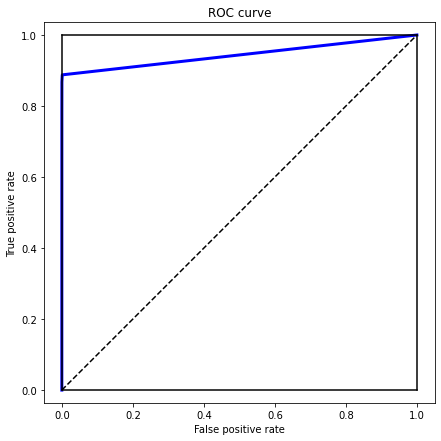

In [25]:
y_pred_proba = knn.predict_proba(X_test)[:, 1]
plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve')
plt.show()

3. Простой классификатор

In [26]:
dc = DummyClassifier()
dc.fit(X_train, y_train)
preds = dc.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, preds)}')
print(f'precision: {precision_score(y_test, preds)}')
print(f'recall: {recall_score(y_test, preds)}')
print(f'f1: {f1_score(y_test, preds)}')
print(f'roc_auc: {roc_auc_score(y_test, preds)}')

accuracy: 0.9982795547909132
precision: 0.0
recall: 0.0
f1: 0.0
roc_auc: 0.5


4. Random Forest (хоть мы его "официально не проходили", использую для сравнения)

In [27]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
preds = rf.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, preds)}')
print(f'precision: {precision_score(y_test, preds)}')
print(f'recall: {recall_score(y_test, preds)}')
print(f'f1: {f1_score(y_test, preds)}')
print(f'roc_auc: {roc_auc_score(y_test, preds)}')

accuracy: 0.9996313331694814
precision: 0.9230769230769231
recall: 0.8571428571428571
f1: 0.888888888888889
roc_auc: 0.9285098782056436


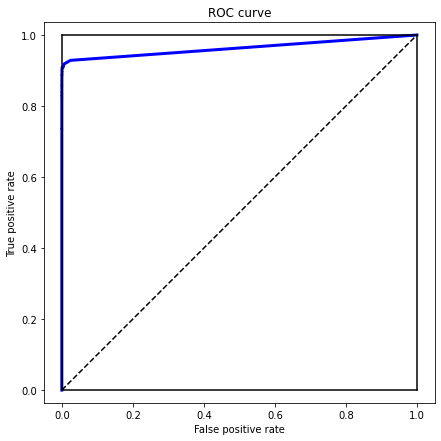

In [28]:
y_pred_proba = rf.predict_proba(X_test)[:, 1]
plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve')
plt.show()

Итак, вот он результат сходу, и причем не такой уж и плохой. Теперь нужно подумать про метрики, поперебирать параметры. Пул моделей останется, наверное, такой же. Во-первых, потому что больше мы не проходили, а, во-вторых, грид серч считается ничо так долго.

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

По-хорошему нужно максимизировать f1_score, которая является агрегацией precision и recall, а в свою очередь каждая из этих метрик отвечает за своё.

- Precision - доля объектов, отнесенных к определенному классу, и при этом действительно являющимися "представителями" этого класса.

- Recall - доля объектов, отнесенных к определенному классу, относительно общего кол-ва представителей этого класса.

Соответсвенно мы хотим, чтобы распознавались все мошенники и в то же время простые пользователи случайно не пострадали. И метрика f1, как уже писал выше, агрегирует обе рассмотренные выше, что в принципе нам и нужно. Будем её использовать.

Единственное, в сложных задачах не всегда удастся максимизировать обе, и тогда нужно оценить какая из метрик важнее для нашего "бизнеса". И, на мой взгляд, важнее Precision, некая точность, чтобы если мы и классифицируем транзакцию мошеннической, то она с очень высокой долей вероятности была таковой, иначе можно растерять клиентов (если неверно классифицировать транзакции простых клиентов и их блокировать).

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
# import sklearn
# sorted(sklearn.metrics.SCORERS.keys())

In [31]:
parameters = {'penalty':('l1', 'l2', 'elasticnet', 'none'), 
              'class_weight':({0: 1, 1: 2}, {0: 1, 1: 5}, {0: 1, 1: 10}, {0: 1, 1: 50}, {0: 1, 1: 100})}
model = LogisticRegression()
gs = GridSearchCV(model, parameters, scoring = 'f1')
gs.fit(X_train, y_train)
preds = gs.predict(X_test)

print(f'f1: {f1_score(y_test, preds)}')

f1: 0.8275862068965518


In [32]:
gs.best_params_

{'class_weight': {0: 1, 1: 5}, 'penalty': 'l2'}

Теперь запустим для knn и сравним полученный результат с лог. регрессией.

In [33]:
parameters = {'n_neighbors':(2, 5, 10), 'weights' : ('uniform', 'distance')}
model = KNeighborsClassifier()
gs = GridSearchCV(model, parameters, scoring = 'f1', verbose = 100, n_jobs = -1)
gs.fit(X_train, y_train)
preds = gs.predict(X_test)

print(f'f1: {f1_score(y_test, preds)}')

Fitting 5 folds for each of 6 candidates, totalling 30 fits


KeyboardInterrupt: ignored

In [ ]:
gs.best_params_

Ну и RF для кучи и сравнения.

In [ ]:
parameters = {'n_estimators':(500, 1000), 
              'criterion' : ('gini', 'entropy'), 'max_depth' : ('None', 500, 1000)}
model = RandomForestClassifier()
gs = GridSearchCV(model, parameters, scoring = 'f1', verbose = 10, n_jobs = -1)
gs.fit(X_train, y_train)
preds = gs.predict(X_test)

print(f'f1: {f1_score(y_test, preds)}')

In [ ]:
gs.best_params_

Параметры попербирали, теперь выберем лучшие, еще раз обучим и зафиксируем качество.

Я прощелкал ячейки выше случайно... Простите...

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# LogReg
model = LogisticRegression(class_weight = {0: 1, 1: 5}, penalty = 'l2', n_jobs = -1)
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(f'Logreg f1: {f1_score(y_test, preds)}')

Logreg f1: 0.7979274611398963


In [59]:
# KNN
model = KNeighborsClassifier(n_neighbors = 2, weights = 'uniform', n_jobs = -1)
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(f'KNN f1: {f1_score(y_test, preds)}')

KNN f1: 0.8421052631578948


In [60]:
# RandomForest
model = RandomForestClassifier(criterion = 'entropy', max_depth = 500, n_estimators = 1000, n_jobs = -1)
model.fit(X_train, y_train)
preds = model.predict(X_test)
print(f'RandomForest f1: {f1_score(y_test, preds)}')

RandomForest f1: 0.8750000000000001


### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

Попробуем побороться с несбалансированными данными, вариантов несколько. Добавить данных, которых меньше, либо же уменьшить кол-во данных, которых больше. Но терять данные не хочется, поэтому будем использовать upsampling.

In [61]:
from imblearn.over_sampling import SMOTE

In [62]:
smote = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=7)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [63]:
y_train_over.value_counts()

0    227451
1    227451
Name: Class, dtype: int64

Так, как будто бы неплохо. Потренируем, использовать будем подобранные ранее параметры.

In [64]:
# KNN
model = KNeighborsClassifier(n_neighbors = 2, weights = 'uniform', n_jobs = -1)
model.fit(X_train_over, y_train_over)
preds = model.predict(X_test)
print(f'KNN f1: {f1_score(y_test, preds)}')

KNN f1: 0.7735849056603773


In [65]:
# RandomForest
model = RandomForestClassifier(criterion = 'entropy', max_depth = 500, n_estimators = 1000, n_jobs = -1)
model.fit(X_train_over, y_train_over)
preds = model.predict(X_test)
print(f'RandomForest f1: {f1_score(y_test, preds)}')

RandomForest f1: 0.8783068783068784


Вот что получилось:
  - Перебор параметров даже у простых моделей работает долго.
  - Борьба с несбалансированными классами. С одной стороны f1 подупала, с другой другие метрики чуть выровнились. 
  - Модели из коробки, "как обычно", работают лучше всего по соотношению качество/затраченное время на подготовку и обучение.

# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

Датасет взял с [каггла](https://www.kaggle.com/datasets/prathamtripathi/drug-classification). Нужно по различным анализам человека предсказать тип наркотика, который он употребил, чтобы предложить лучшее лекарство. Таргет - 3 класса, не далеко ушел от бинарной, но все же.

In [66]:
!unzip drags.zip

Archive:  drags.zip
  inflating: drug200.csv             


In [69]:
df_drags = pd.read_csv('drug200.csv')

In [70]:
df_drags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [71]:
df_drags.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [72]:
df_drags.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [77]:
df_drags.head(3)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC


In [78]:
df_drags.Cholesterol.unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [79]:
df_drags = df_drags.replace({'Cholesterol' : {'NORMAL' : 0, 'HIGH' : 1}})

In [80]:
df_drags.Sex.unique()

array(['F', 'M'], dtype=object)

In [82]:
one_hot = pd.get_dummies(df_drags['Sex'])
df_drags = df_drags.drop('Sex', axis=1)
df_drags = df_drags.join(one_hot)

In [84]:
df_drags.BP.unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [85]:
df_drags = df_drags.replace({'BP' : {'NORMAL' : 1, 'HIGH' : 2, 'LOW':0}})

In [86]:
df_drags.head(3)

,Age,BP,Cholesterol,Na_to_K,Drug,F,M
0,23,2,1,25.355,DrugY,1,0
1,47,0,1,13.093,drugC,0,1
2,47,0,1,10.114,drugC,0,1


### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

In [87]:
X = df_drags.drop('Drug', axis=1)
y = df_drags['Drug']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [99]:
lr = LogisticRegression(multi_class = 'auto')
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, preds)}')
print(f'precision: {precision_score(y_test, preds, average="weighted")}')
print(f'recall: {recall_score(y_test, preds, average="weighted")}')
print(f'f1_weighted: {f1_score(y_test, preds, average="weighted")}')
print(f'f1_macro: {f1_score(y_test, preds, average="macro")}')
print(f'f1_micro: {f1_score(y_test, preds, average="micro")}')

accuracy: 0.975
precision: 0.9763157894736842
recall: 0.975
f1_weighted: 0.9747425997425998
f1_macro: 0.985070785070785
f1_micro: 0.975


In [100]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
preds = rf.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, preds)}')
print(f'precision: {precision_score(y_test, preds, average="weighted")}')
print(f'recall: {recall_score(y_test, preds, average="weighted")}')
print(f'f1_weighted: {f1_score(y_test, preds, average="weighted")}')
print(f'f1_macro: {f1_score(y_test, preds, average="macro")}')
print(f'f1_micro: {f1_score(y_test, preds, average="micro")}')

accuracy: 0.975
precision: 0.9763157894736842
recall: 0.975
f1_weighted: 0.9747425997425998
f1_macro: 0.985070785070785
f1_micro: 0.975


### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?

В этой задаче, как мне кажется, важен скорее тоже precision. Мы получается определенно знаем, что человек принимал наркотики, нужно определить какие именно, и здесь также важна точность, чтобы не назначить неэффективное решение. Но если бы речь шла о бинарной классификации, где нужно определить вообще принимал ли, то использовали бы recall, нестрашно определить человека, как того, что принимал, и потом распознать ошибку при дальнейших исследованиях, но фатально пропустить того кто действительно принимал.

И опять как и в прошлой задаче, можем ли мы выбрать что-то одно, сможем ли максимизировать оба параметра. Да, f1 агрегирует, но все же перевешивает ли один паказатель другой? Такие прям дискуссионные вопросы.

In [114]:
parameters = {'n_neighbors':(2, 5, 10), 'weights':('uniform', 'distance')}
model = KNeighborsClassifier()
gs = GridSearchCV(model, parameters, scoring = 'precision', verbose = 100, n_jobs = -1)
gs.fit(X_train, y_train)
preds = gs.predict(X_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [115]:
gs.best_params_

{'n_neighbors': 2, 'weights': 'uniform'}

In [116]:
print(f'accuracy: {accuracy_score(y_test, preds)}')
print(f'precision: {precision_score(y_test, preds, average="weighted")}')
print(f'recall: {recall_score(y_test, preds, average="weighted")}')
print(f'f1_weighted: {f1_score(y_test, preds, average="weighted")}')
print(f'f1_macro: {f1_score(y_test, preds, average="macro")}')
print(f'f1_micro: {f1_score(y_test, preds, average="micro")}')

accuracy: 0.75
precision: 0.740625
recall: 0.75
f1_weighted: 0.7099696356275305
f1_macro: 0.5766531713900135
f1_micro: 0.75


То ли датасет я взял маленький, то ли еще что-то. Но на грид серче показатели меньше, причем гораздо. Но на праду больше похоже именно они, потому что качество 97 из коробки страшит.